# ASSIGNMENT 5

## Read R tutorial for SVMs from the book and solve questions 5,6, and 7 from the book.

## QUESTION 5

### We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary.We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#### a) Generate a data set with n=500 and p=2, such that the observations belong to two classes with a quadratic decision boundary between them.

In [51]:
set.seed(1)
x1 <- runif(500) - 0.5
x2 <- runif(500) - 0.5
y <- 1 * (x1^2 - x2^2 > 0)

#### b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis and X2 on the y-axis.

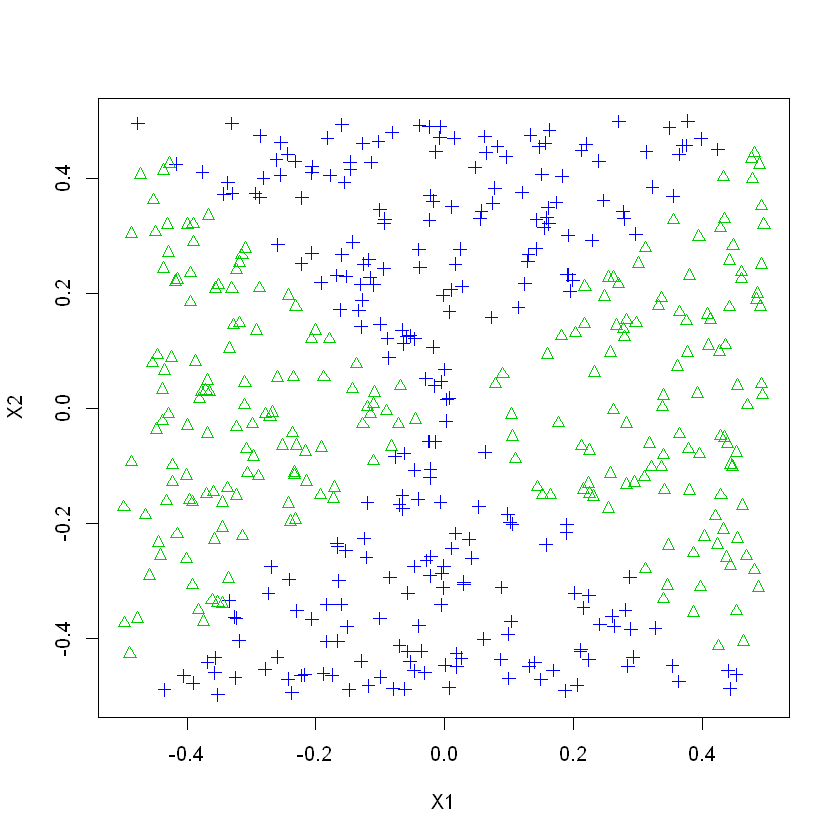

In [52]:
plot(x1, x2, xlab = "X1", ylab = "X2", col = (4 - y), pch = (3 - y))

#### c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [53]:
logit.fit <- glm(y ~ x1 + x2, family = "binomial")
summary(logit.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial")

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.179  -1.139  -1.112   1.206   1.257  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.087260   0.089579  -0.974    0.330
x1           0.196199   0.316864   0.619    0.536
x2          -0.002854   0.305712  -0.009    0.993

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.18  on 499  degrees of freedom
Residual deviance: 691.79  on 497  degrees of freedom
AIC: 697.79

Number of Fisher Scoring iterations: 3


#### d) Apply this model to training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

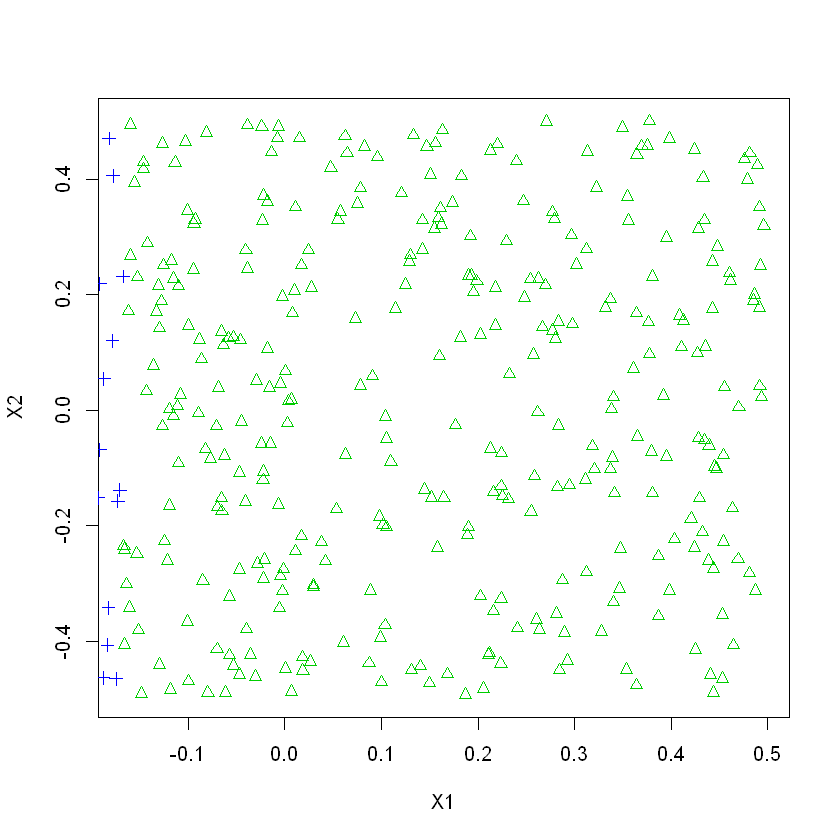

In [54]:
df <- data.frame(x1 = x1, x2 = x2, y = y)
probabilities <- predict(logit.fit, df, type = "response")
predictions <- rep(0, 500)
predictions[probabilities > 0.47] <- 1
plot(df[predictions == 1, ]$x1, df[predictions == 1, ]$x2, col = (4 - 1), pch = (3 - 1), xlab = "X1", ylab = "X2")
points(df[predictions == 0, ]$x1, df[predictions == 0, ]$x2, col = (4 - 0), pch = (3 - 0))

#### e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors.

In [55]:
logitnl.fit <- glm(y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [56]:
summary(logitnl.fit)


Call:
glm(formula = y ~ poly(x1, 2) + poly(x2, 2) + I(x1 * x2), family = "binomial")

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-8.240e-04  -2.000e-08  -2.000e-08   2.000e-08   1.163e-03  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    -102.2     4302.0  -0.024    0.981
poly(x1, 2)1   2715.3   141109.5   0.019    0.985
poly(x1, 2)2  27218.5   842987.2   0.032    0.974
poly(x2, 2)1   -279.7    97160.4  -0.003    0.998
poly(x2, 2)2 -28693.0   875451.3  -0.033    0.974
I(x1 * x2)     -206.4    41802.8  -0.005    0.996

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9218e+02  on 499  degrees of freedom
Residual deviance: 3.5810e-06  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


#### f) Apply this model to training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should obvioulsy be non-linear.

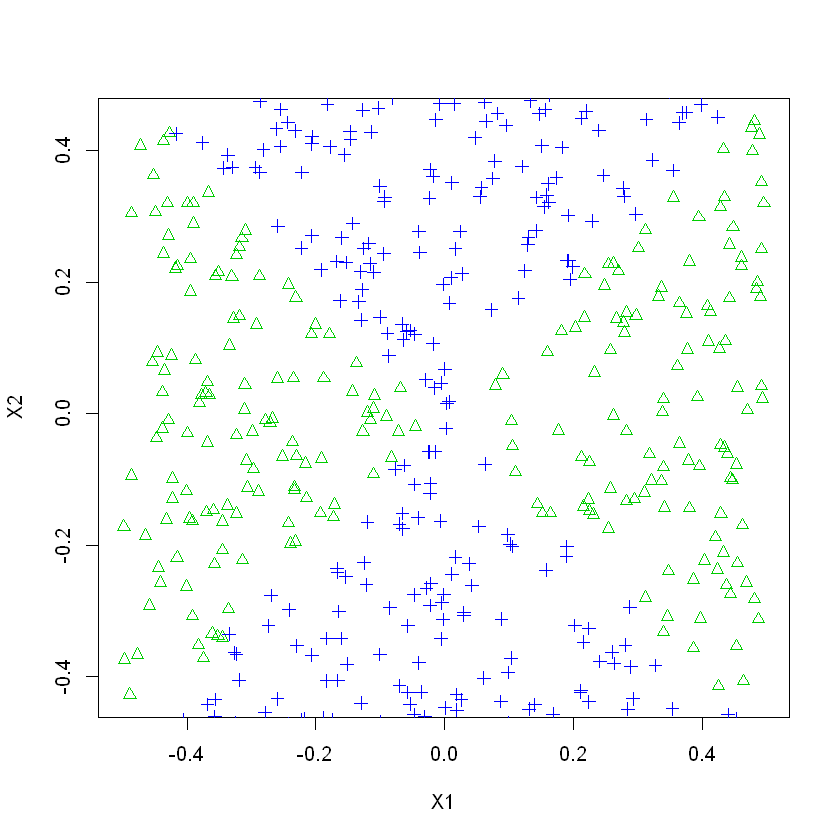

In [57]:
probabilities <- predict(logitnl.fit, df, type = "response")
predictions <- rep(0, 500)
predictions[probabilities > 0.47] <- 1
plot(df[predictions == 1, ]$x1, df[predictions == 1, ]$x2, col = (4 - 1), pch = (3 - 1), xlab = "X1", ylab = "X2")
points(df[predictions == 0, ]$x1, df[predictions == 0, ]$x2, col = (4 - 0), pch = (3 - 0))

#### g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels. 

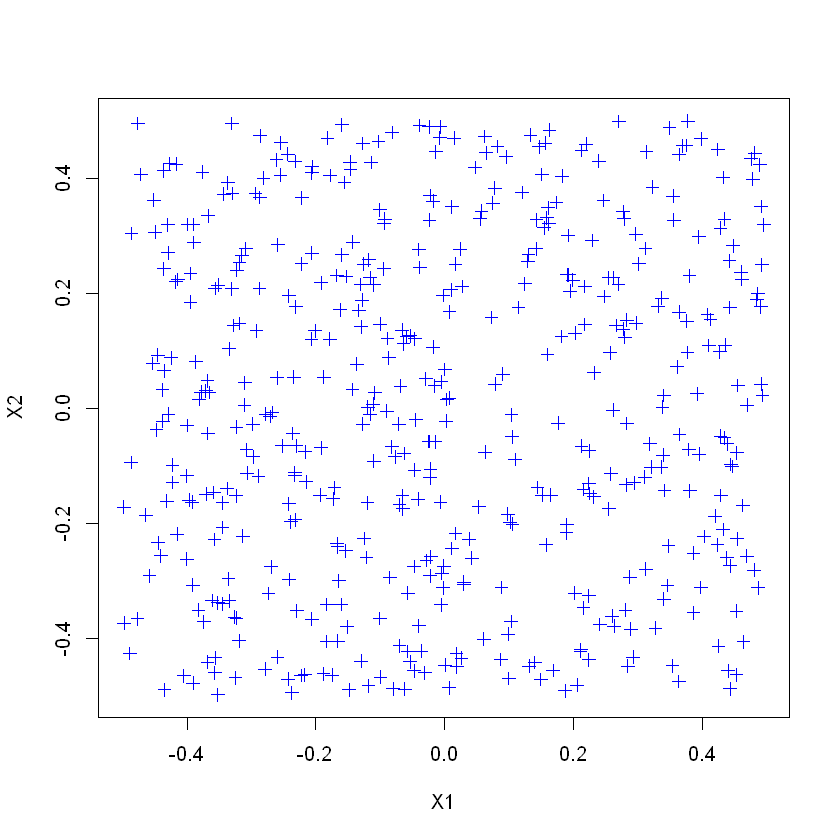

In [58]:
df$y <- as.factor(df$y)
svm.fit <- svm(y ~ x1 + x2, df, kernel = "linear", cost = 0.01)
predictions <- predict(svm.fit, df)
plot(df[predictions == 0, ]$x1, df[predictions == 0, ]$x2, col = (4 - 0), pch = (3 - 0), xlab = "X1", ylab = "X2")
points(df[predictions == 1, ]$x1, df[predictions == 1, ]$x2, col = (4 - 1), pch = (3 - 1))

#### h) Fit a SVM using a non-linear kernel to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

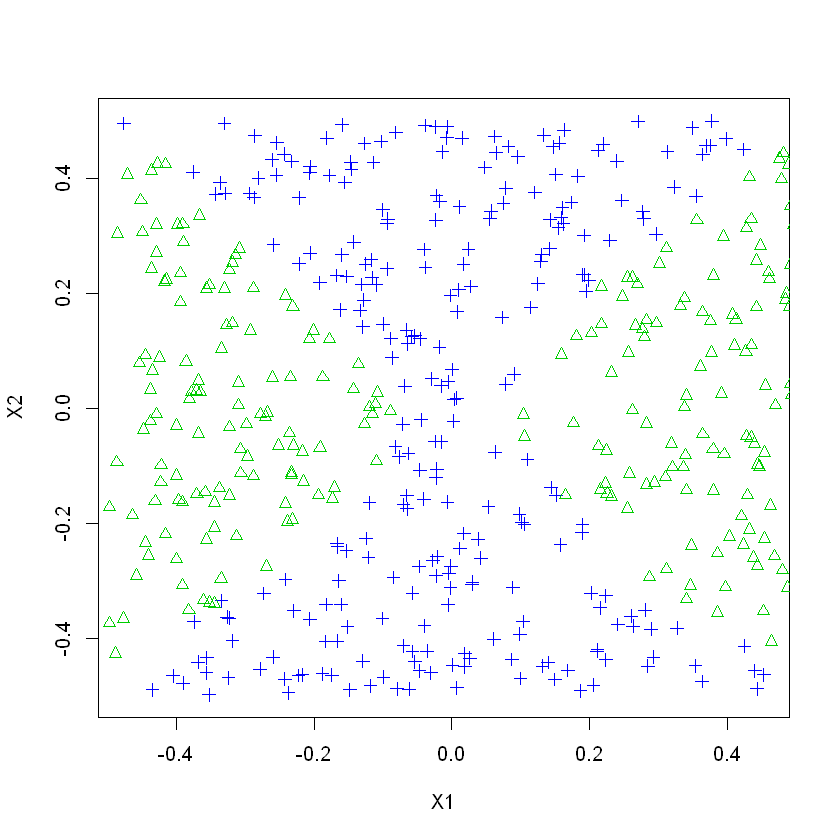

In [59]:
df$y <- as.factor(df$y)
svmnl.fit <- svm(y ~ x1 + x2, df, kernel = "radial", gamma = 1)
predictions <- predict(svmnl.fit, df)
plot(df[predictions == 0, ]$x1, df[predictions == 0, ]$x2, col = (4 - 0), pch = (3 - 0), xlab = "X1", ylab = "X2")
points(df[predictions == 1, ]$x1, df[predictions == 1, ]$x2, col = (4 - 1), pch = (3 - 1))

#### i) Comment on your results.

This experiment shows that SVMs with non-linear kernel are really effective in finding boundary when it is non-linear.

## QUESTION 6

### At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of “cost” that misclassifies a couple of training observations may perform better on test data than one with a huge value of “cost” that does not misclassify any training observations. You will now investigate that claim.

#### a) Generate two-class data with p=2 in such a way that the classes are just barely linearly separable.

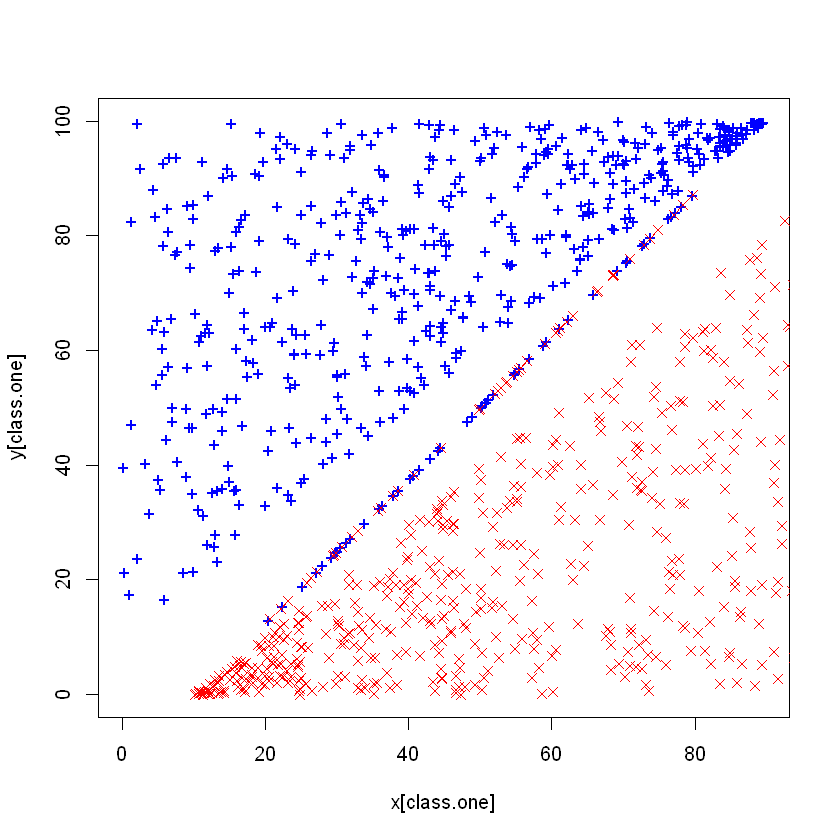

In [60]:
set.seed(1)
x.one <- runif(500, 0, 90)
y.one <- runif(500, x.one + 10, 100)
x.one.noise <- runif(50, 20, 80)
y.one.noise <- 5/4 * (x.one.noise - 10) + 0.1

x.zero <- runif(500, 10, 100)
y.zero <- runif(500, 0, x.zero - 10)
x.zero.noise <- runif(50, 20, 80)
y.zero.noise <- 5/4 * (x.zero.noise - 10) - 0.1

class.one <- seq(1, 550)
x <- c(x.one, x.one.noise, x.zero, x.zero.noise)
y <- c(y.one, y.one.noise, y.zero, y.zero.noise)

plot(x[class.one], y[class.one], col = "blue", pch = "+", ylim = c(0, 100))
points(x[-class.one], y[-class.one], col = "red", pch = 4)

#### b) Compute the cross-validation error rates for support vector classifiers with a range of “cost” values. How many training errors are misclassified for each value of “cost” considered, and how does this relate to the cross-validation errors obtained ? 

In [61]:
set.seed(555)
z = rep(0, 1100)
z[class.one] = 1
data = data.frame(x = x, y = y, z = z)
tune.out = tune(svm, as.factor(z) ~ ., data = data, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100, 1000, 10000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
  cost
 10000

- best performance: 0 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.06272727 0.02119047
2 1e-01 0.05000000 0.01880254
3 1e+00 0.04818182 0.01918926
4 5e+00 0.05090909 0.01926091
5 1e+01 0.04909091 0.01973190
6 1e+02 0.04454545 0.02075260
7 1e+03 0.04090909 0.02752409
8 1e+04 0.00000000 0.00000000


In [62]:
data.frame(cost = tune.out$performance$cost, misclass = tune.out$performance$error * 1100)

cost,misclass
1e-02,69
1e-01,55
1e+00,53
5e+00,56
1e+01,54
1e+02,49
1e+03,45
1e+04,0


with cost of 10000 classify all training points correctly 

#### c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of “cost” considered. Which value of “cost” leads to the values of “cost” that yield the fewest training errors and the fewest cross-validation errors ?

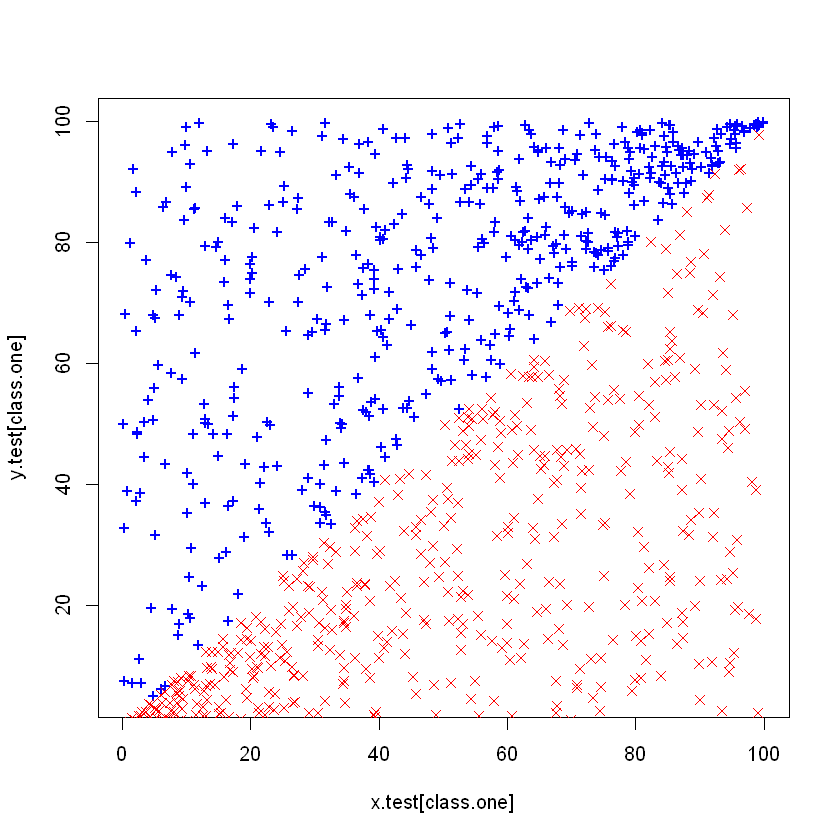

In [63]:
x.test <- runif(1000, 0, 100)
class.one <- sample(1000, 500)
y.test <- rep(NA, 1000)

for (i in class.one) {
    y.test[i] <- runif(1, x.test[i], 100)
}

for (i in setdiff(1:1000, class.one)) {
    y.test[i] <- runif(1, 0, x.test[i])
}
plot(x.test[class.one], y.test[class.one], col = "blue", pch = "+")
points(x.test[-class.one], y.test[-class.one], col = "red", pch = 4)

In [64]:
set.seed(3)
z.test <- rep(0, 1000)
z.test[class.one] <- 1
data.test <- data.frame(x = x.test, y = y.test, z = as.factor(z.test))
costs <- c(0.01, 0.1, 1, 5, 10, 100, 1000, 10000)
test.err <- rep(NA, length(costs))
for (i in 1:length(costs)) {
    svm.fit <- svm(z ~ ., data = data, kernel = "linear", cost = costs[i])
    pred <- predict(svm.fit, data.test)
    test.err[i] <- sum(pred != data.test$z)
}
data.frame(cost = costs, misclass = test.err)

cost,misclass
1e-02,1000
1e-01,1000
1e+00,1000
5e+00,1000
1e+01,1000
1e+02,1000
1e+03,1000
1e+04,1000


#### d) Discuss your results.

with a large cost we are getting overfit. so, it is basically rational to chase a best point to not give up from learning and not getting overfit.

## QUESTION 7

### In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the “Auto” data set.

#### a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [65]:
library(ISLR)
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

#### b) Fit a support vector classifier to the data with various values of “cost”, in order to predict whether a car gets high of low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [66]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07653846 0.03617137
2 1e-01 0.04596154 0.03378238
3 1e+00 0.01025641 0.01792836
4 5e+00 0.02051282 0.02648194
5 1e+01 0.02051282 0.02648194
6 1e+02 0.03076923 0.03151981
7 1e+03 0.03076923 0.03151981


Cost of 1 is the best

#### c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of “gamma” and “degree” and “cost”. Comment on your results.

In [67]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3013462 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5511538 0.04366593
2  1e-01      2 0.5511538 0.04366593
3  1e+00      2 0.5511538 0.04366593
4  5e+00      2 0.5511538 0.04366593
5  1e+01      2 0.5130128 0.08963366
6  1e+02      2 0.3013462 0.09961961
7  1e-02      3 0.5511538 0.04366593
8  1e-01      3 0.5511538 0.04366593
9  1e+00      3 0.5511538 0.04366593
10 5e+00      3 0.5511538 0.04366593
11 1e+01      3 0.5511538 0.04366593
12 1e+02      3 0.3446154 0.09821588
13 1e-02      4 0.5511538 0.04366593
14 1e-01      4 0.5511538 0.04366593
15 1e+00      4 0.5511538 0.04366593
16 5e+00      4 0.5511538 0.04366593
17 1e+01      4 0.5511538 0.04366593
18 1e+02      4 0.5511538 0.04366593


the lowest cross-validation error, degree = 2 and  cost = 100

In [68]:
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01282051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55115385 0.04366593
2  1e-01 1e-02 0.08929487 0.04382379
3  1e+00 1e-02 0.07403846 0.03522110
4  5e+00 1e-02 0.04852564 0.03303346
5  1e+01 1e-02 0.02557692 0.02093679
6  1e+02 1e-02 0.01282051 0.01813094
7  1e-02 1e-01 0.21711538 0.09865227
8  1e-01 1e-01 0.07903846 0.03874545
9  1e+00 1e-01 0.05371795 0.03525162
10 5e+00 1e-01 0.02820513 0.03299190
11 1e+01 1e-01 0.03076923 0.03375798
12 1e+02 1e-01 0.03583333 0.02759051
13 1e-02 1e+00 0.55115385 0.04366593
14 1e-01 1e+00 0.55115385 0.04366593
15 1e+00 1e+00 0.06384615 0.04375618
16 5e+00 1e+00 0.05884615 0.04020934
17 1e+01 1e+00 0.05884615 0.04020934
18 1e+02 1e+00 0.05884615 0.04020934
19 1e-02 5e+00 0.55115385 0.04366593
20 1e-01 5e+00 0.55115385 0.04366593
21 1e+00 5e+00 0.49493590 0.04724924
22

the lowest cross-validation error, gamma = 0.01 and cost = 100

#### d) Make some plots to back up your assertions in (b) and (c).

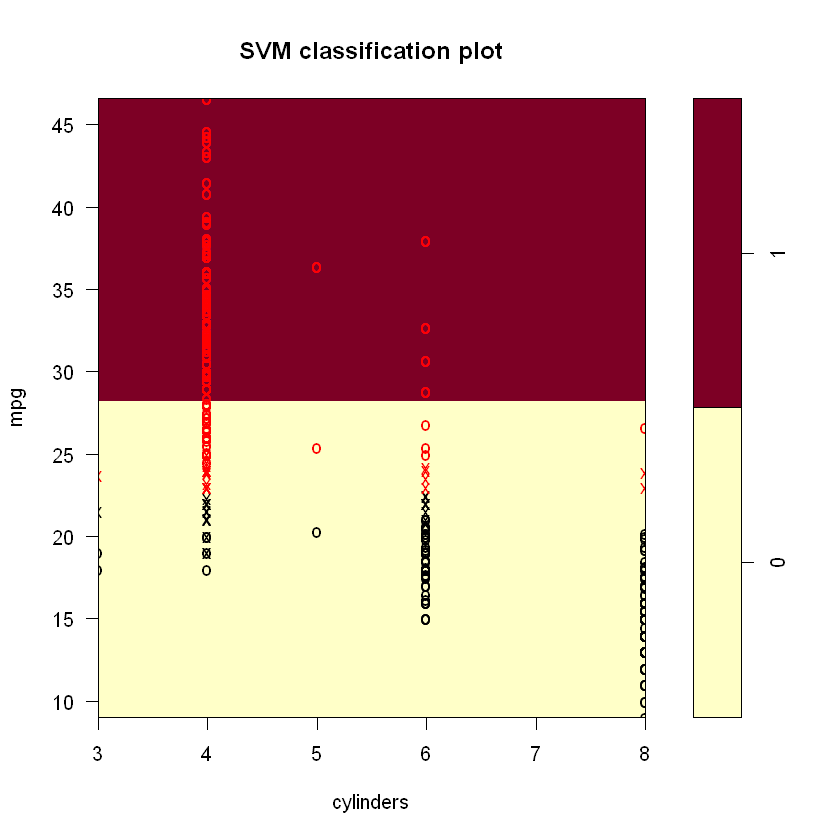

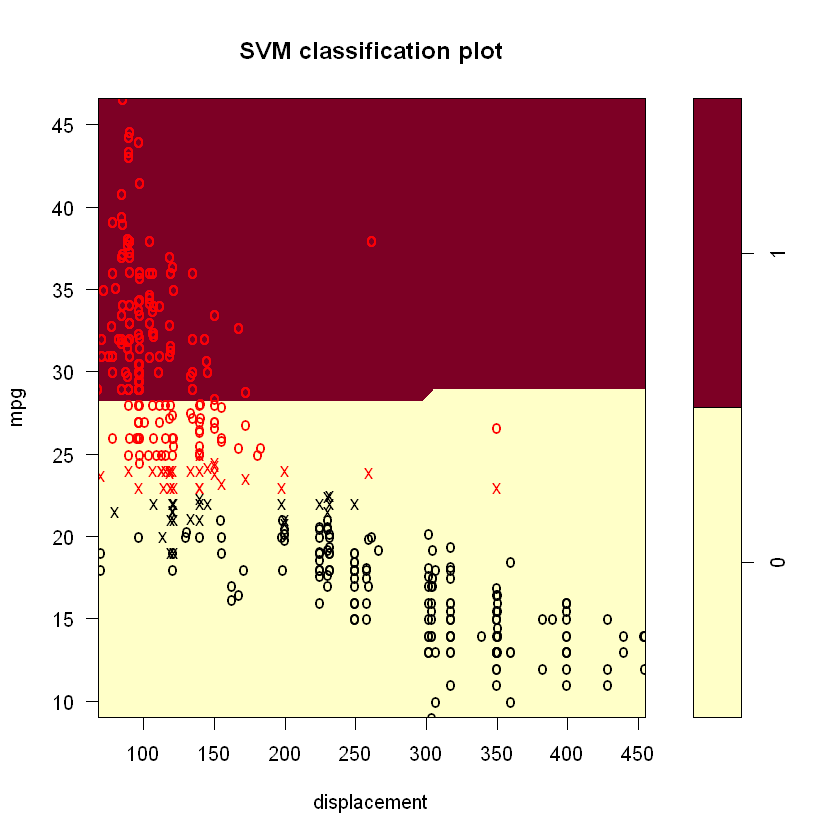

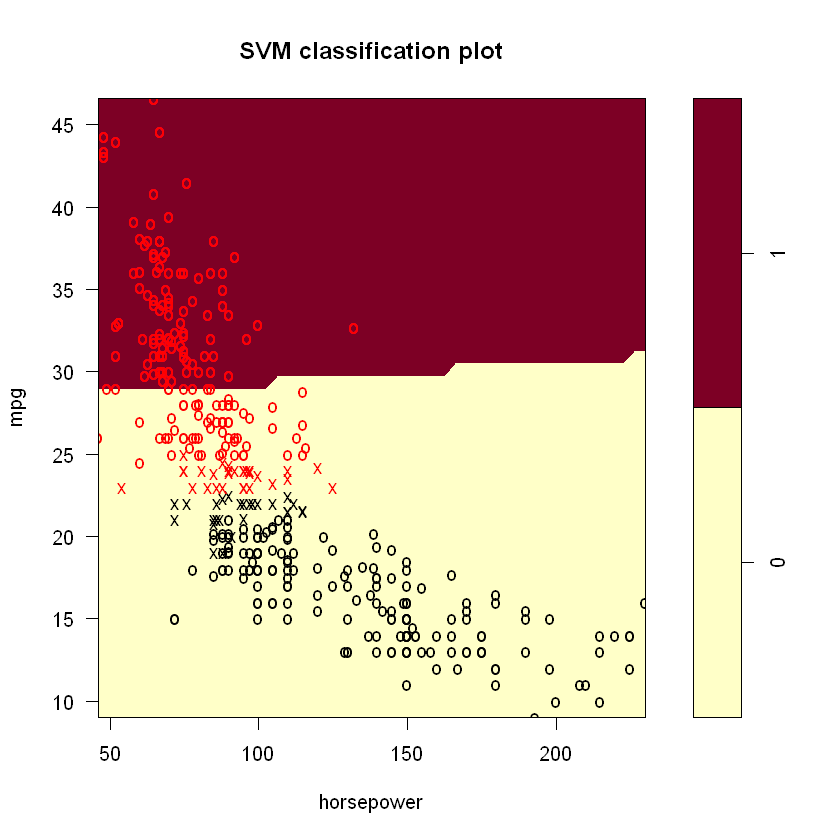

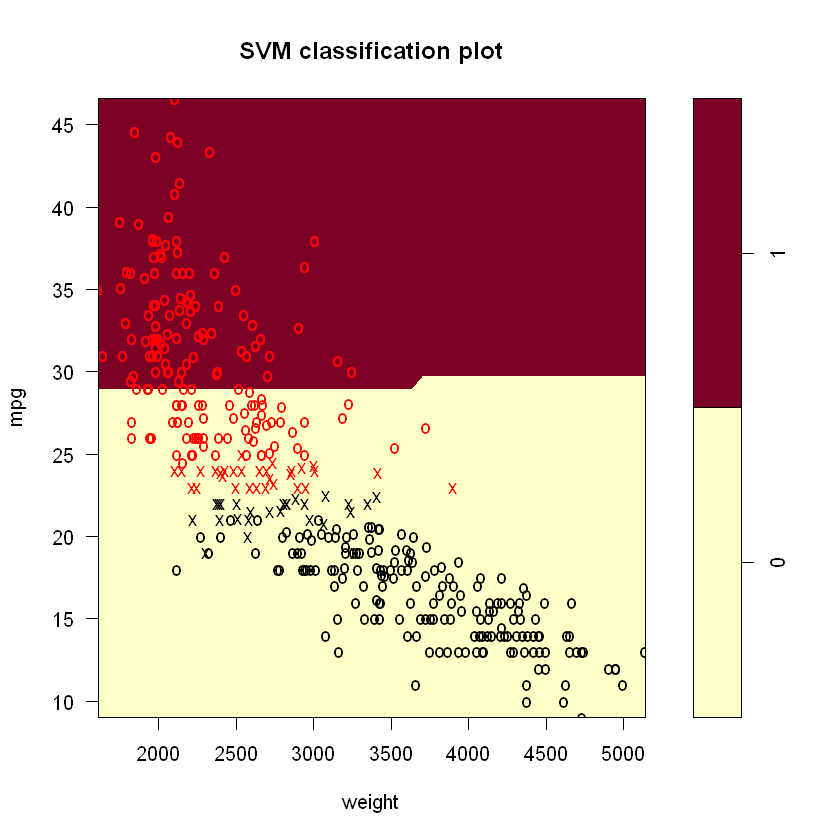

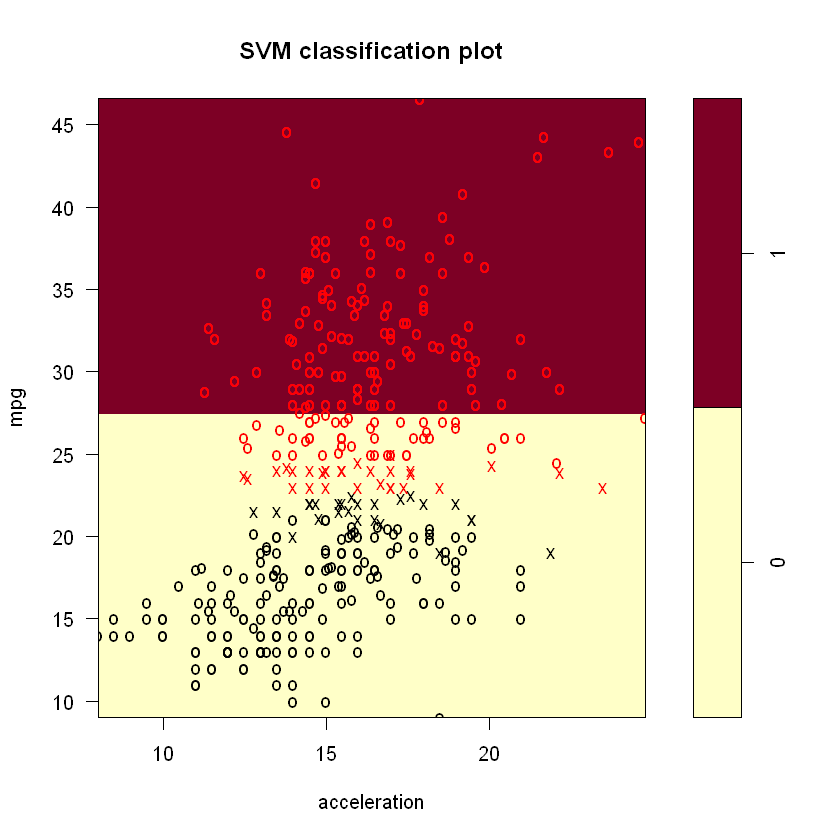

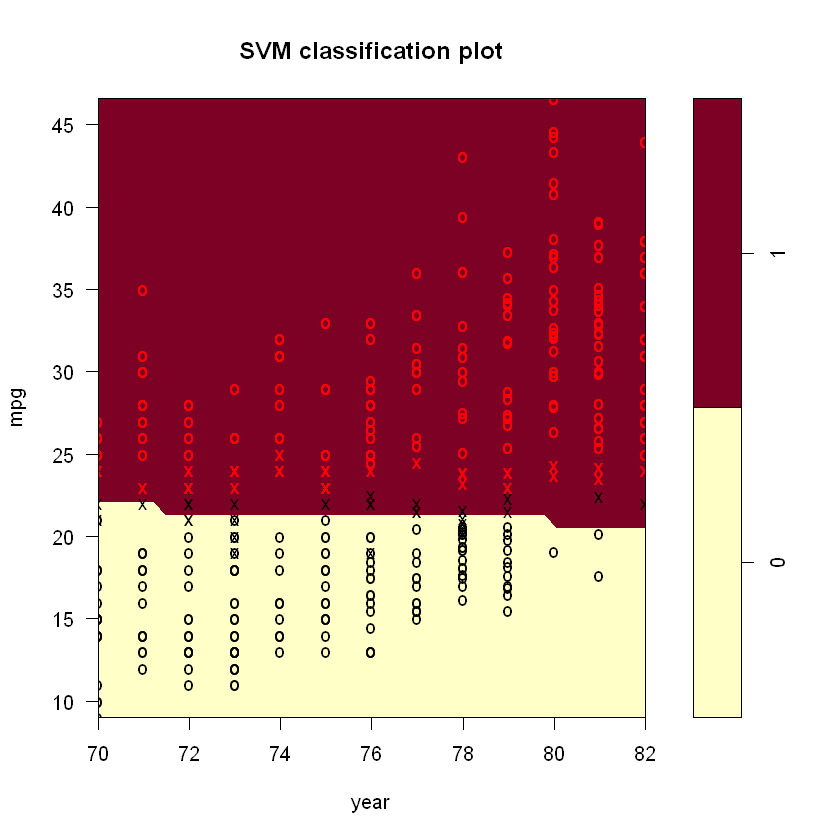

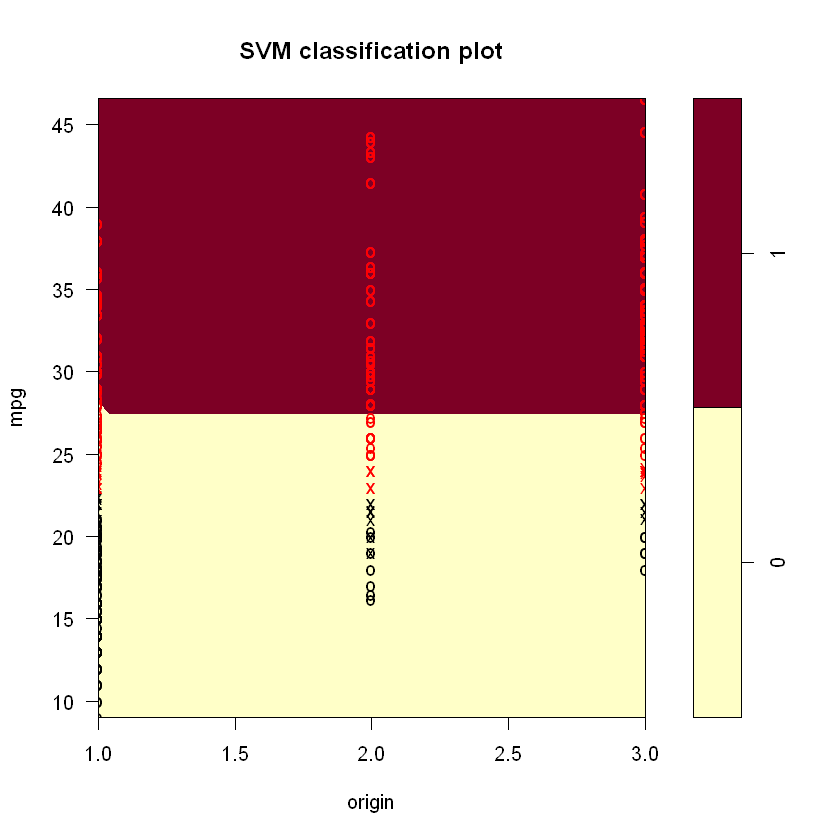

In [69]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

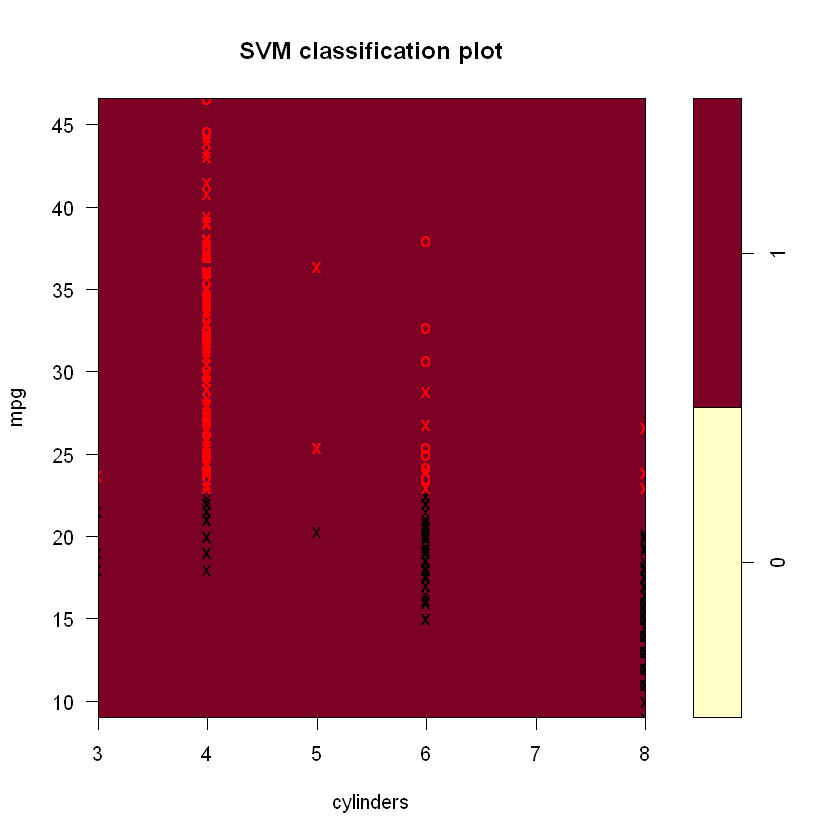

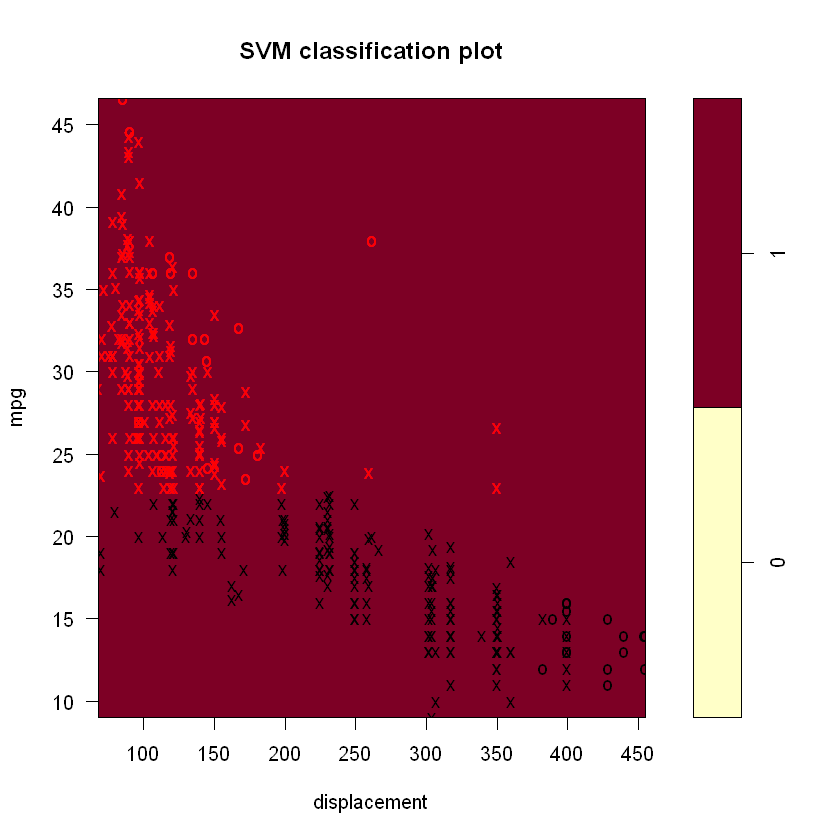

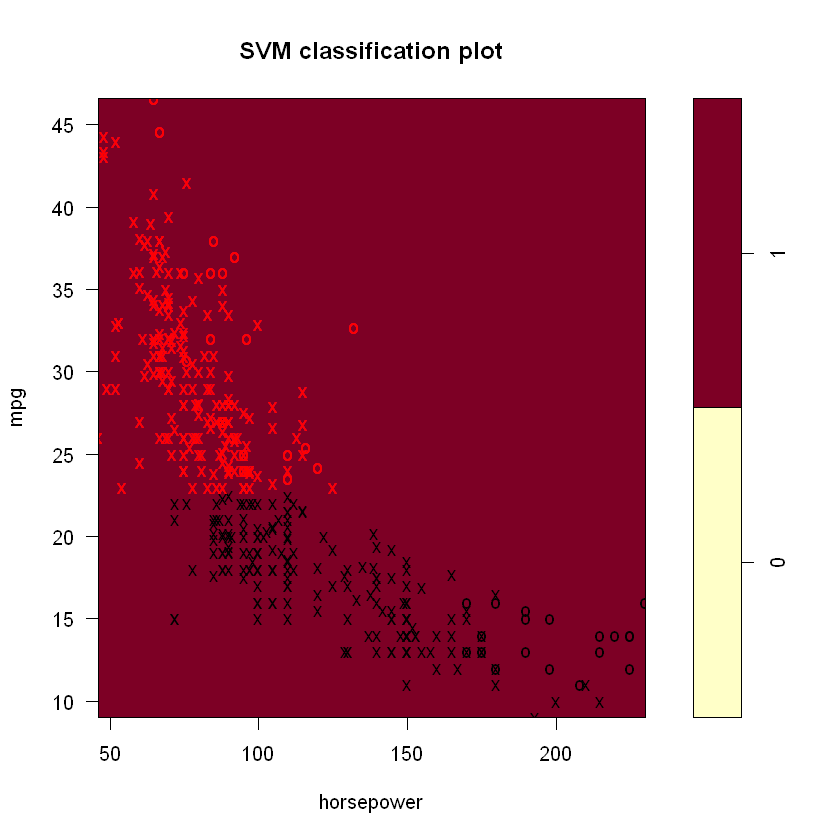

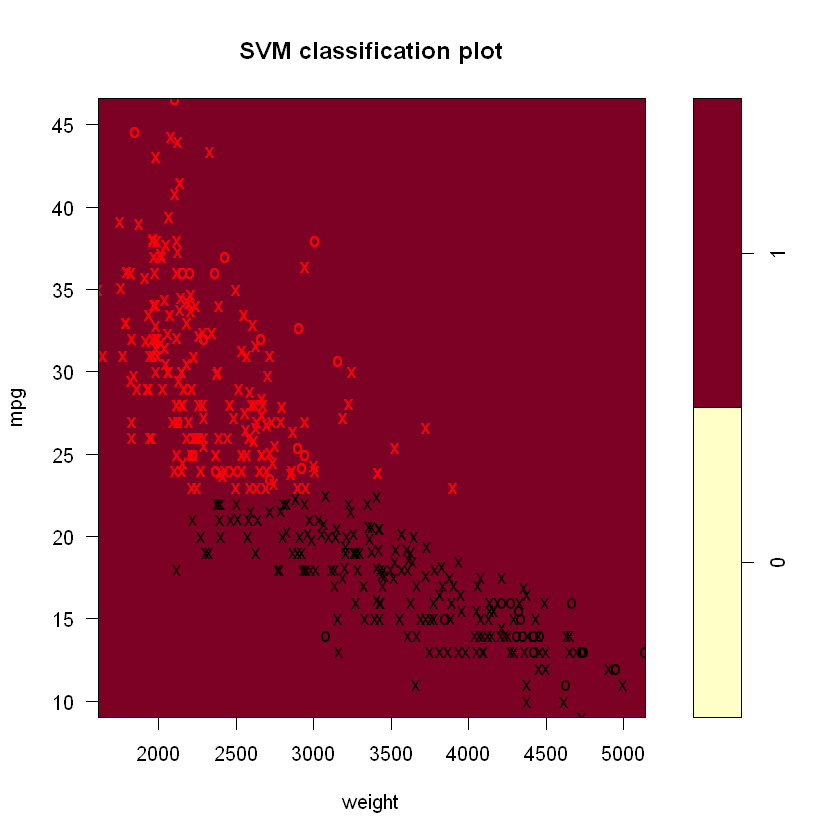

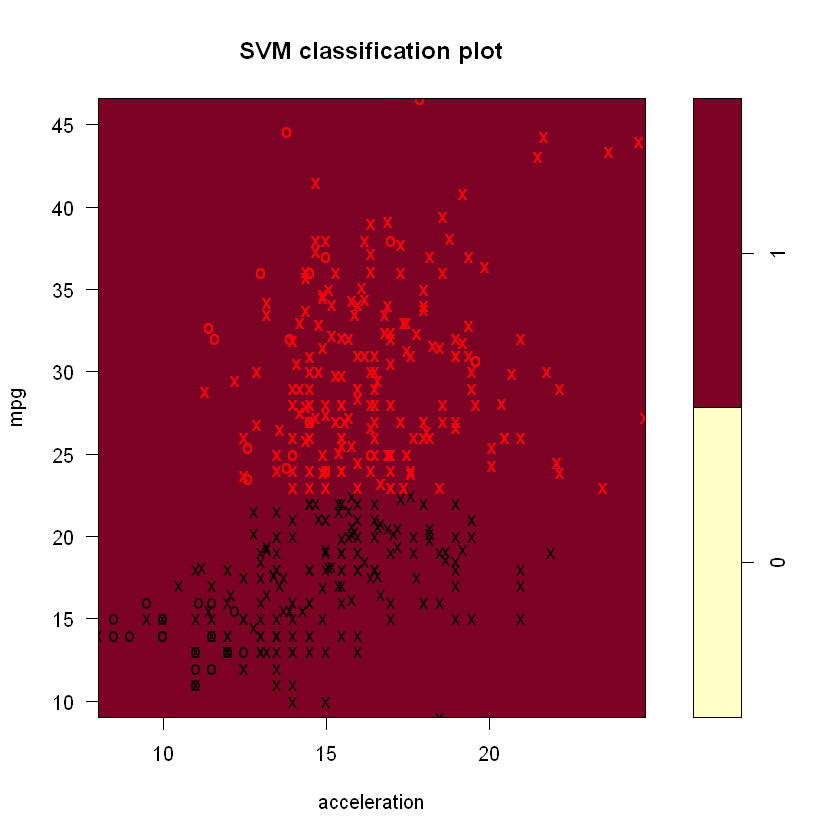

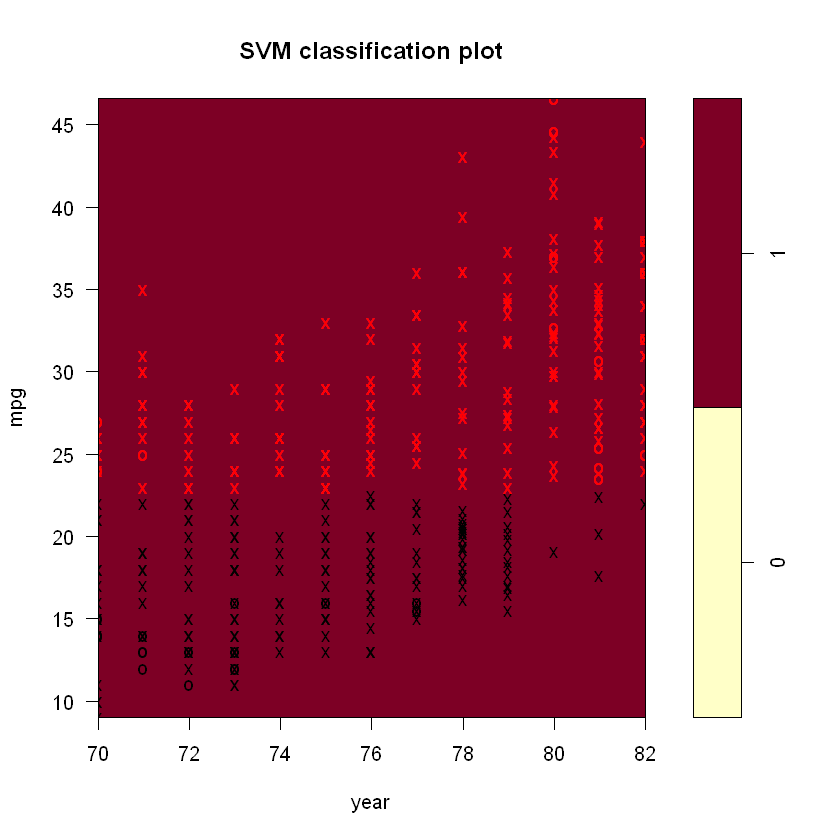

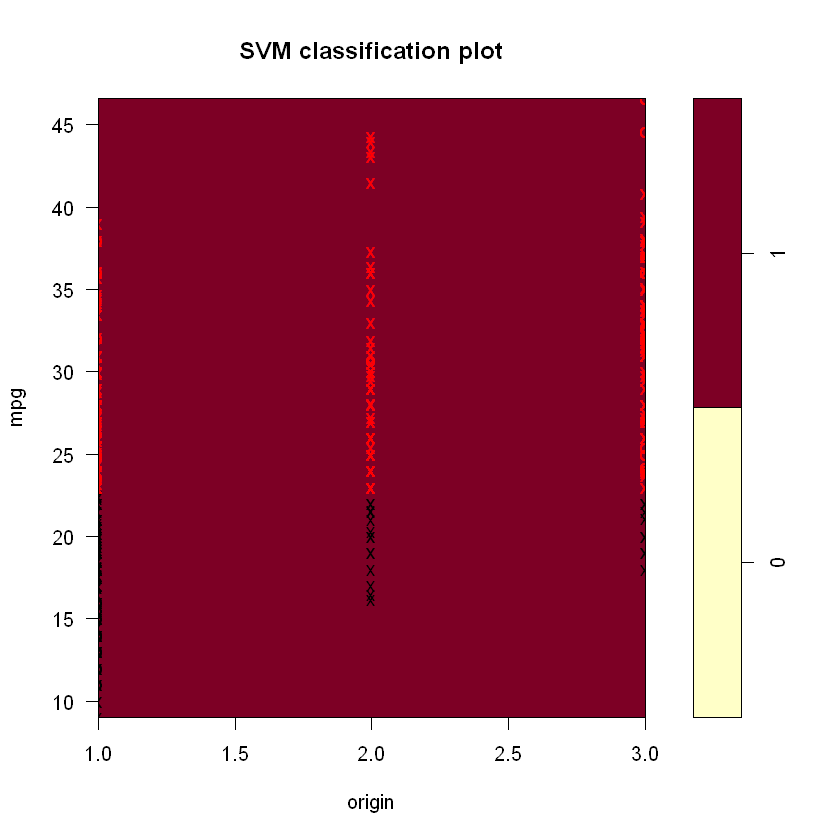

In [70]:
plotpairs(svm.poly)

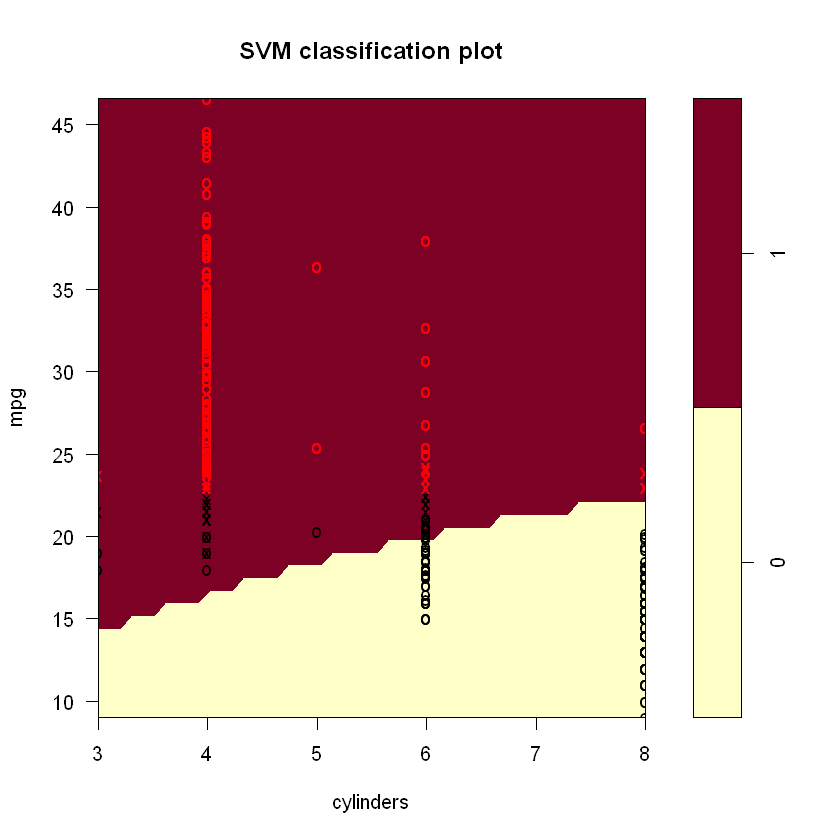

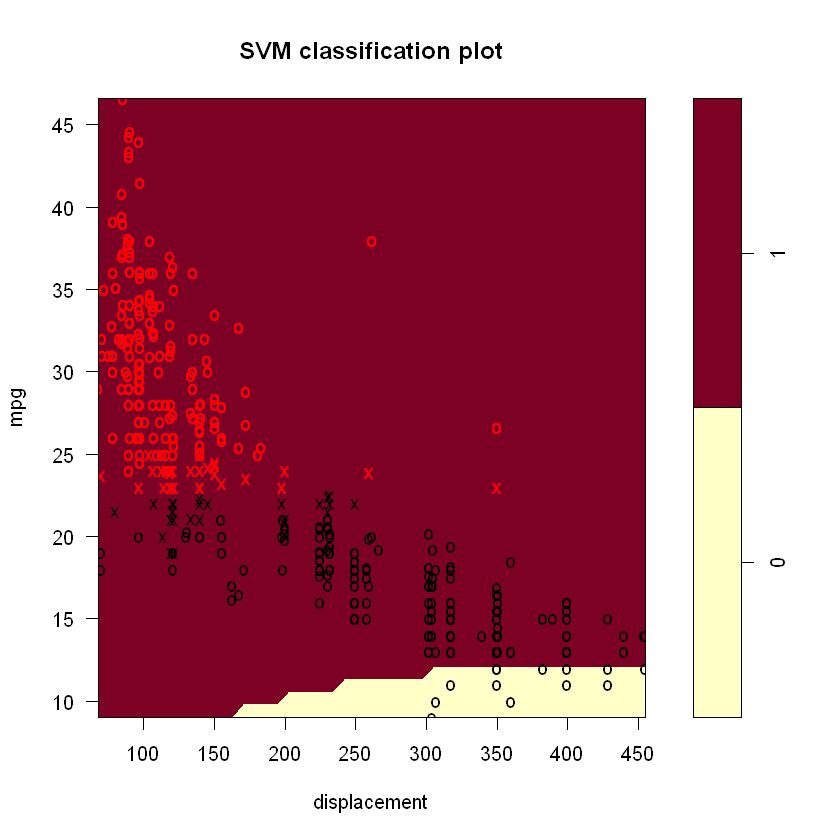

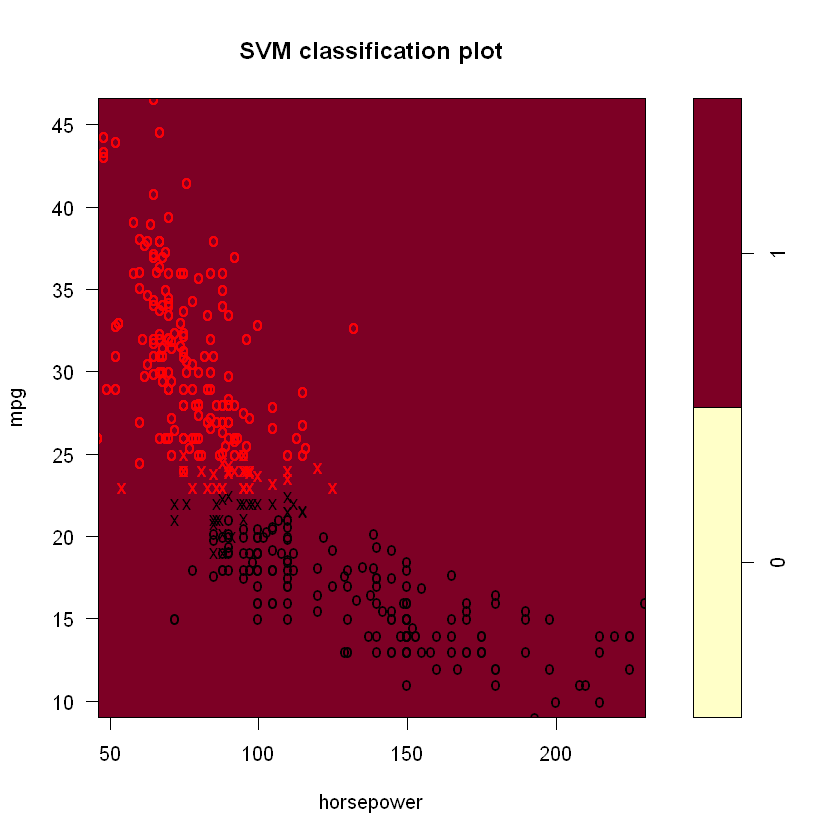

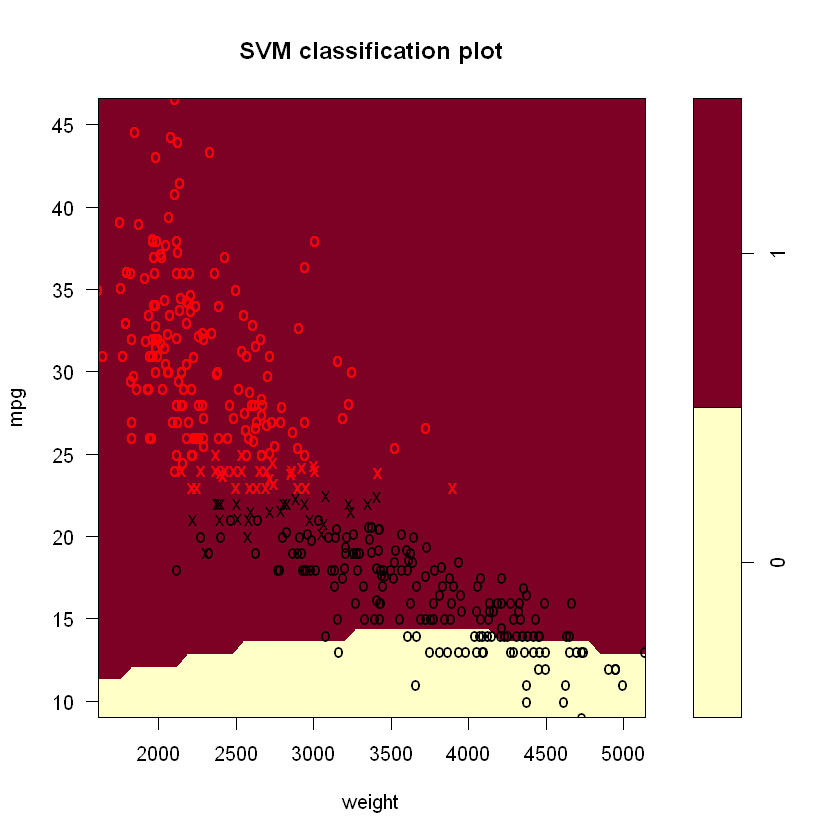

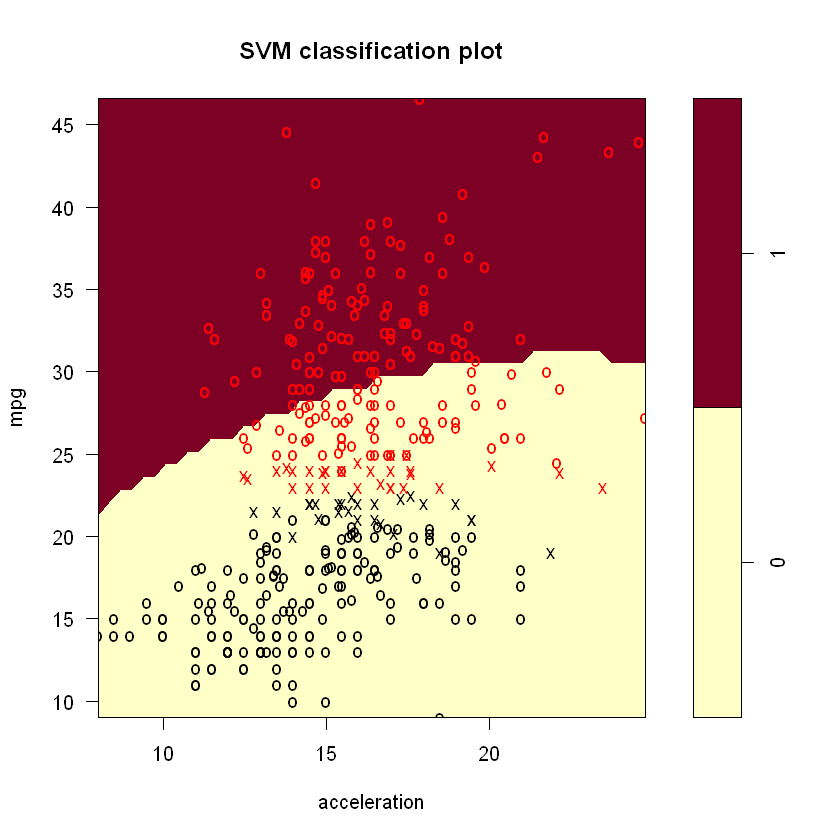

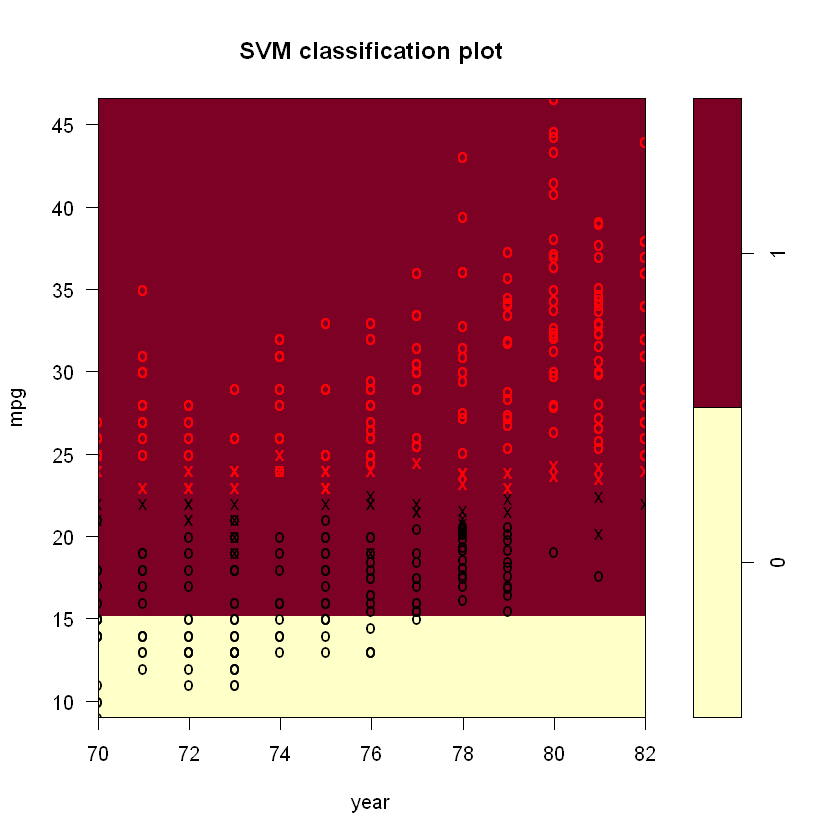

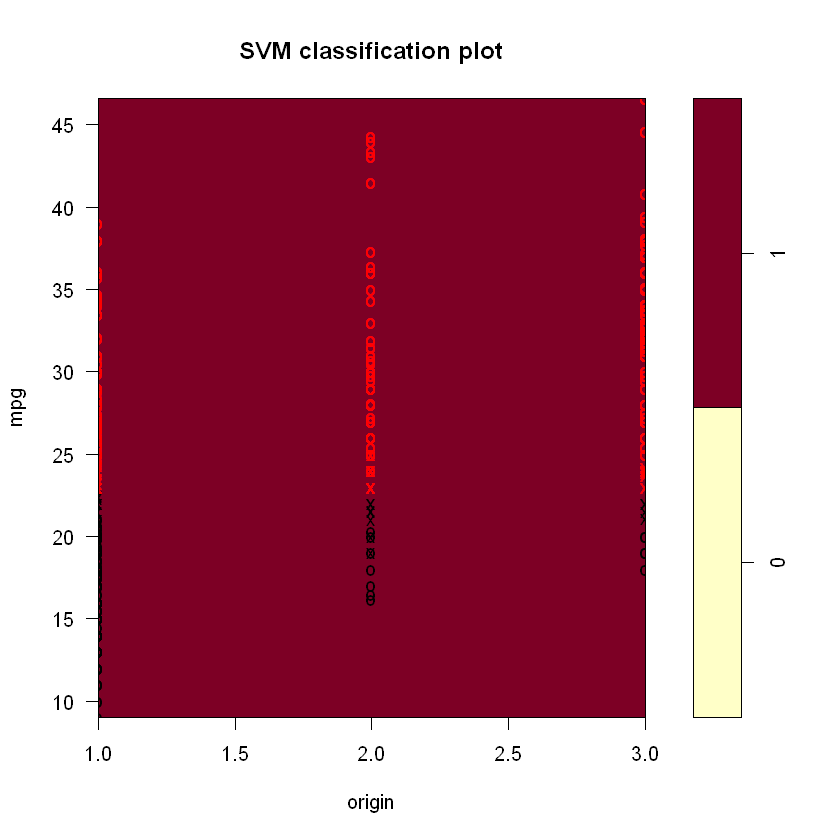

In [71]:
plotpairs(svm.radial)